# LDA Clustering

## 1. Imports

In [31]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whatsupaleks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Load data

In [32]:
df = pd.read_json("../../data/preprocessed/translated_results.json")

In [33]:
df.head()

Content original_language  \
0  ARIVE | Your favorite brandsGet the appOur Vis...                en   
1  Rückabwicklung - von Lebensversicherungen Wir ...                de   
2     Starke Versicherungen für deinen Lifestyle ...                de   
3    RESTUBE - the airbag for more freedom and sa...                en   
4  CureVac - Wir revolutionieren die mRNA für das...                de   

                                       Content_in_de  
0  ANKOMMEN | Ihre LieblingsmarkenHolen Sie sich ...  
1  Rückabwicklung - von Lebensversicherungen Wir ...  
2     Starke Versicherungen für deinen Lifestyle ...  
3  RESTUBE - the airbag for more freedom and safe...  
4  CureVac - Wir revolutionieren die mRNA für das...

In [34]:
df.drop("Content", axis=1, inplace=True)
df.head()

original_language                                      Content_in_de
0                en  ANKOMMEN | Ihre LieblingsmarkenHolen Sie sich ...
1                de  Rückabwicklung - von Lebensversicherungen Wir ...
2                de     Starke Versicherungen für deinen Lifestyle ...
3                en  RESTUBE - the airbag for more freedom and safe...
4                de  CureVac - Wir revolutionieren die mRNA für das...

## 3. Clean Data

In [35]:
import sys
sys.path.insert(0, '../../src/02 Data Preprocessing')
from Preprocessing import preprocess_data



In [36]:
df['Content_in_de'] = preprocess_data(df['Content_in_de'])

In [37]:
df.head()

original_language                                      Content_in_de
0                en  ankomm lieblingsmarkenhol appuns visionpartner...
1                de  ruckabwickl lebensversicher hol doppelt leb re...
2                de  stark versicher lifestyl held de hom produkt a...
3                en  restub the airbag for mor freedom and safety t...
4                de  curevac revolutioni mrna leb mensch fuhrungste...

## 4. Vectorize webpage texts

In [41]:
# Erstelle den TF-IDF-Vektorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1), max_df=0.8, min_df=0.2)
tfidf_matrix = vectorizer.fit_transform(df['Content_in_de'])

## 5. Apply LDA Clustering

In [42]:
# Führe das LDA Clustering durch
num_clusters = 24  # Anzahl der Cluster
lda = LDA(n_components = num_clusters)
lda_clustering = lda.fit_transform(tfidf_matrix.toarray())

In [43]:
df['Cluster'] = np.argmax(lda_clustering, axis=-1).tolist()
df

original_language                                      Content_in_de  \
0                   en  ankomm lieblingsmarkenhol appuns visionpartner...   
1                   de  ruckabwickl lebensversicher hol doppelt leb re...   
2                   de  stark versicher lifestyl held de hom produkt a...   
3                   en  restub the airbag for mor freedom and safety t...   
4                   de  curevac revolutioni mrna leb mensch fuhrungste...   
...                ...                                                ...   
3275                de  lemonsgat hom fokus referenz technologi job da...   
3276                de  safily uberspring such such schliess warenkorb...   
3277                de  startseit ico lux fraud prevention karri news ...   
3278                en  versus vergleich kategoriensmartphonesgrafikka...   
3279                de   selfstorag munch and deutschlandweit storag hero   

      Cluster  
0           0  
1           6  
2          16  
3           8  
4          13  
...       ...  
3275       13  
3276       18  
3277       13  
3278        8  
3279        0  

[3258 rows x 3 columns]

## 6. Visualize in Wordclouds

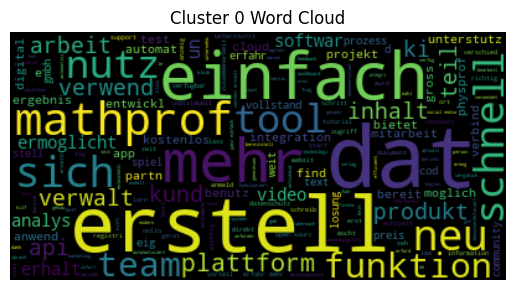

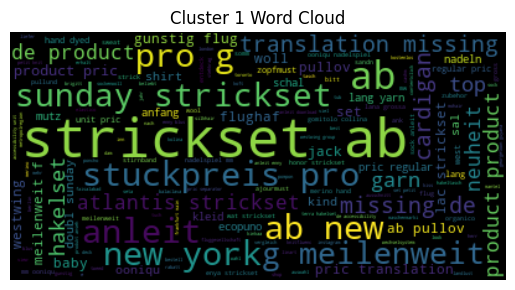

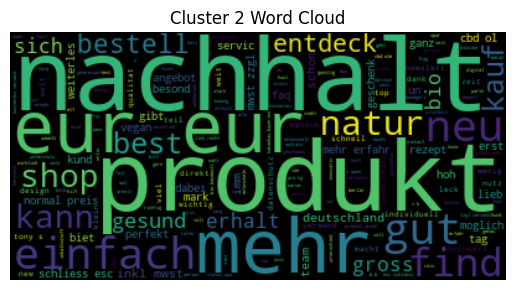

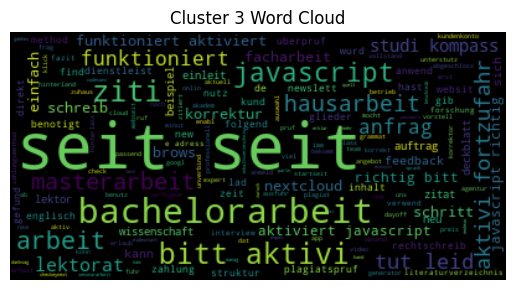

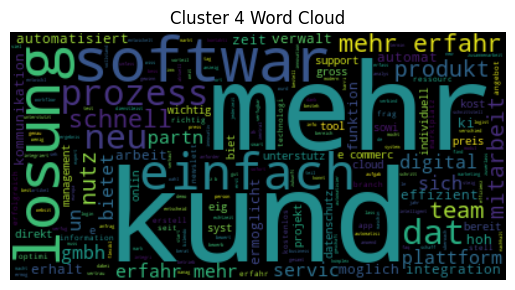

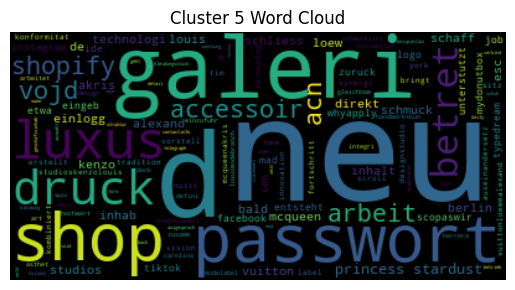

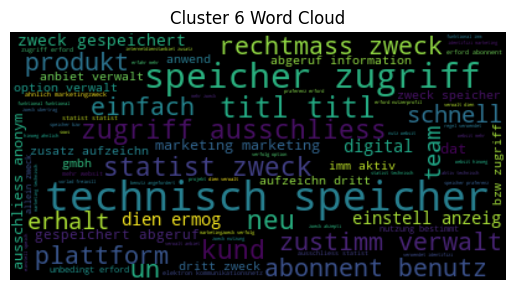

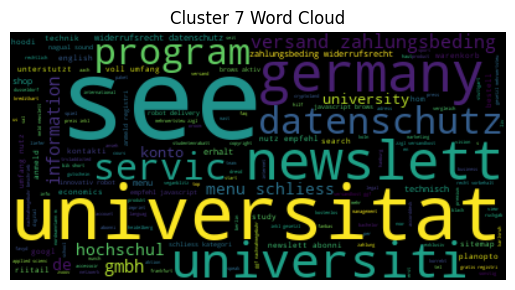

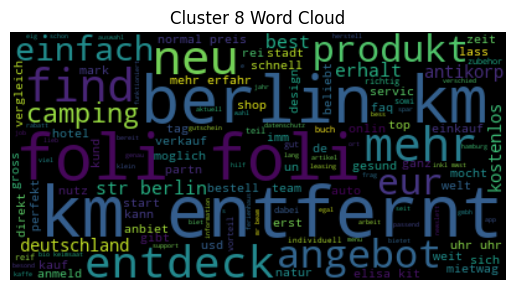

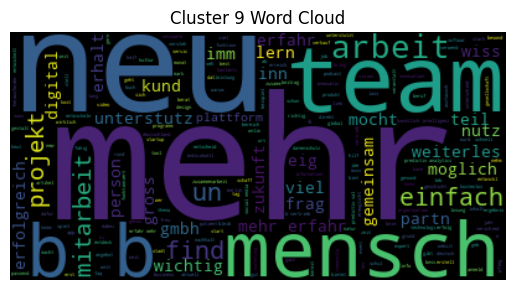

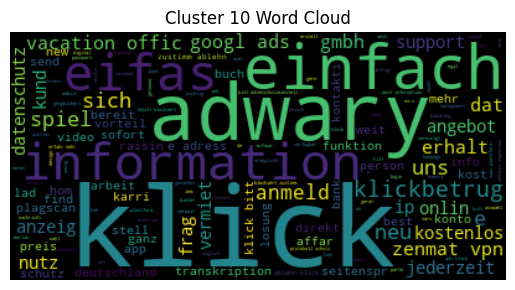

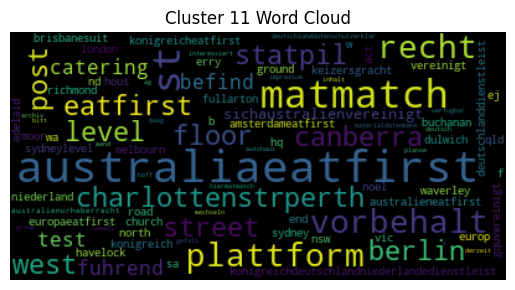

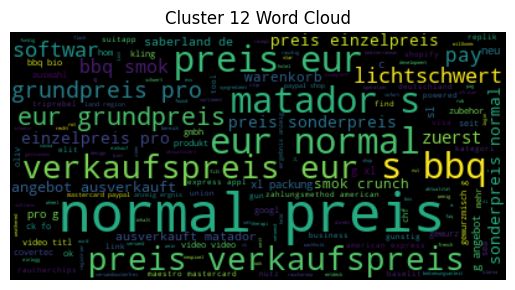

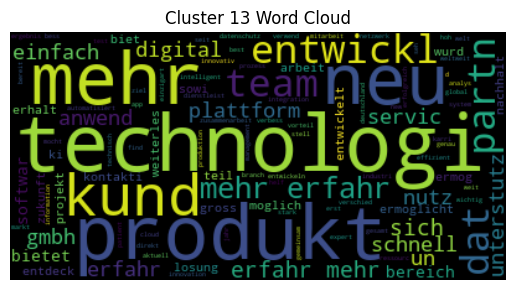

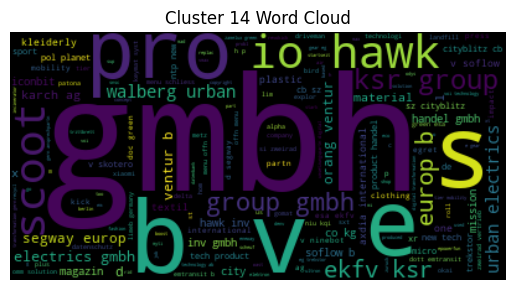

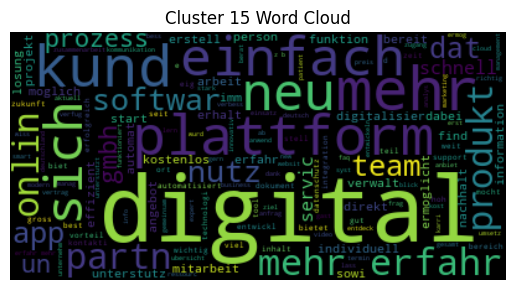

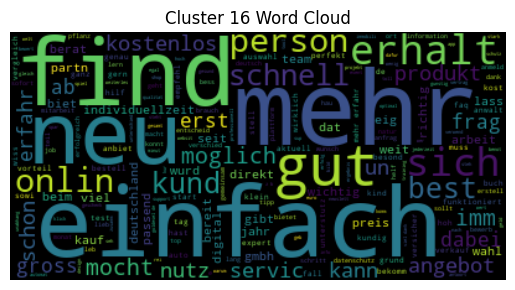

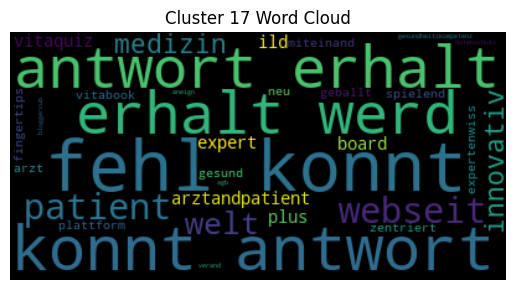

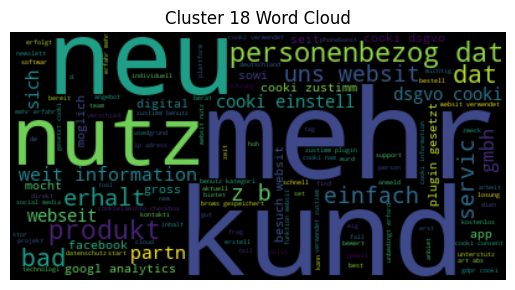

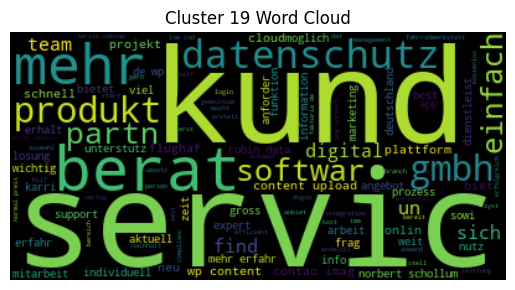

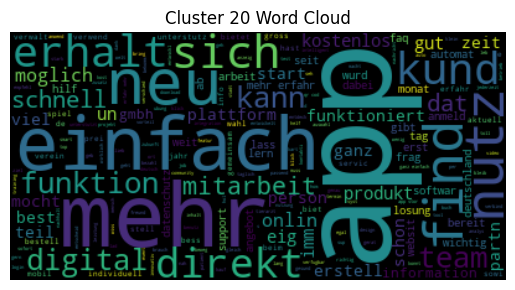

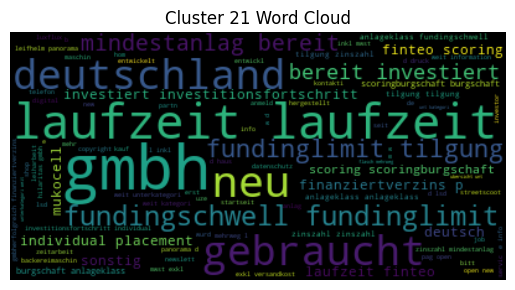

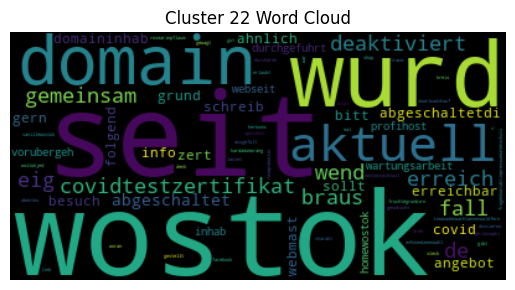

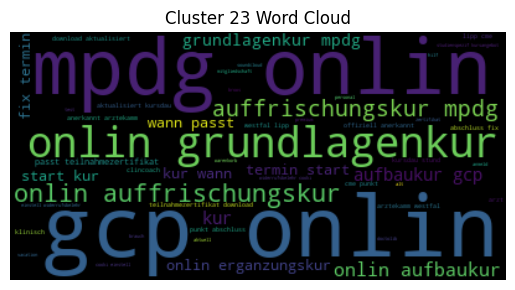

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Print texts for each cluster
for cluster in range(num_clusters):
    cluster_texts = df.loc[df['Cluster'] == cluster, 'Content_in_de']

    # Plot relevant words of the cluster
    cluster_text = ' '.join(cluster_texts)
    wordcloud = WordCloud().generate(cluster_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster} Word Cloud")
    plt.show()